To compare different ones (one with SAM and one without) we take the results, store them, and plot them in the same function.

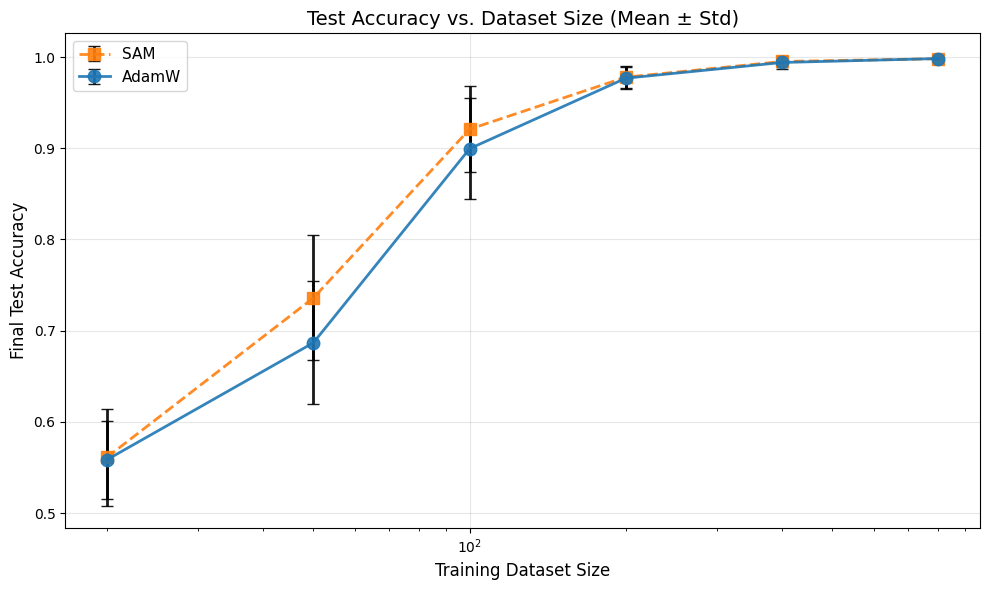

✅ Comparison plot saved to .\test_acc_comparison.png


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

# ============================
# Compare two saved .npz files
# ============================

# --- User configuration ---
base_output_dir = "."
file_A = os.path.join(base_output_dir, "test_acc_base.npz")
file_B = os.path.join(base_output_dir, "test_acc_SAM.npz")

label_A = "AdamW"
label_B = "SAM"

# --- Check existence ---
missing = [f for f in [file_A, file_B] if not os.path.exists(f)]
if missing:
    print(f"❌ Missing files:\n{missing}")
else:
    # --- Load both datasets ---
    data_A = np.load(file_A)
    data_B = np.load(file_B)

    sizes_A = data_A["dataset_sizes"]
    mean_A = data_A["mean_accuracies"]
    std_A = data_A["std_accuracies"]

    sizes_B = data_B["dataset_sizes"]
    mean_B = data_B["mean_accuracies"]
    std_B = data_B["std_accuracies"]

    # --- Plot comparison ---
    plt.figure(figsize=(10, 6))

    plt.errorbar(sizes_B, mean_B, yerr=std_B,
                 fmt='s--', capsize=4, linewidth=2, markersize=9,
                 color='tab:orange', ecolor='black', alpha=0.9, label=label_B)
    
    plt.errorbar(sizes_A, mean_A, yerr=std_A,
                 fmt='o-', capsize=4, linewidth=2, markersize=9,
                 color='tab:blue', ecolor='black', alpha=0.9, label=label_A)

    plt.xscale("log")
    #plt.yscale("log")
    
    plt.xlabel("Training Dataset Size", fontsize=12)
    plt.ylabel("Final Test Accuracy", fontsize=12)
    plt.title("Test Accuracy vs. Dataset Size (Mean ± Std)", fontsize=14)
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    plt.savefig("imgs/test_acc_comparison.png", bbox_inches="tight")
    plt.show()
    plt.close()

    print(f"✅ Comparison plot saved to {save_path}")


In [2]:
# --- Print nicely ---
print("Dataset Size | AdamW Mean Accuracy | SAM Mean Accuracy")
print("-----------------------------------------------")
for s_A, m_A, s_B, m_B in zip(sizes_A, mean_A, sizes_B, mean_B):
    print(f"{s_A:12} | {m_A:18.4f} | {m_B:16.4f}")

Dataset Size | AdamW Mean Accuracy | SAM Mean Accuracy
-----------------------------------------------
          20 |             0.5584 |           0.5611
          50 |             0.6867 |           0.7359
         100 |             0.8996 |           0.9210
         200 |             0.9769 |           0.9780
         400 |             0.9941 |           0.9952
         800 |             0.9984 |           0.9982
